In [ ]:
from sympy import *
from IPython.display import Latex
init_printing()

We will look at a two lens system using symbolic python (it's kind of like Mathematica). First define our symbols

In [2]:
f1,f2,d, di,do, f,a,b,c,d = symbols('f1,f2,d di do f a b c d')

Now we are going to define our _ABCD_ matrices. _ImageM_ is the matrix from the image to the last lens. _ObjM_ is the matrix from the object to the first lens. _Lens1M, Lens2M_ describe the thin lenses and _DistM_ is the matrix for the distance d between the matrices.

In [3]:
ImageM=Matrix([[1 ,di],[0,1]])
ObjM=Matrix([[1,do],[0,1]])
Lens1M=Matrix([[1,0],[-1/f1,1]])
Lens2M=Matrix([[1,0],[-1/f2,1]])
DistM=Matrix([[1,d],[0,1]])

Let's propagate the matrices for the lens system, remembering to order them from last to first seen.

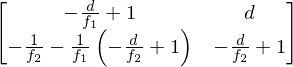

In [8]:
M=Lens2M*DistM*Lens1M
M

Defining the _A,B,C,D_ components of this matrix for later use.

In [9]:
A=M[0,0]
B=M[0,1]
C=M[1,0]
D=M[1,1]

Below we find the effective focal length and simplify the answer

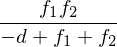

In [11]:
Feff=-1/C
simplify(Feff)

And now the principal planes of the system _p1 and p2_

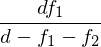

In [12]:
P1=(1-D)/C
simplify(P1)

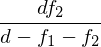

In [13]:
P2=(1-A)/C
simplify(P2)

Now let's make create the combined _ABCD_ matrix that includes the object and image distances, so we can calculate where the image is, _B=0_, and the magnification _A_

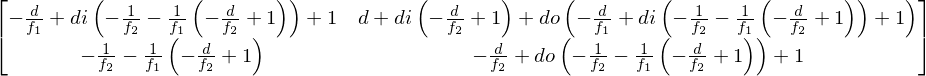

In [14]:
G=ImageM*M*ObjM
G

OK that's ugly, so we can use the simplify command.

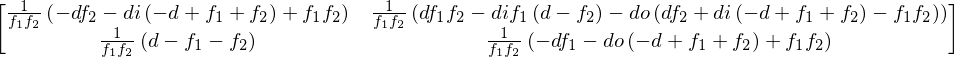

In [20]:
simplify(G)

To find the image location, requires the bit of the matrix corresponding to _B_ to equal zero. Below we display the _B_ component, otherwise known as _G[0,1]_, with the substitutions $f_1=10, f_2=-5$cm, and $d=5$cm

In [29]:
G[0,1].subs([[f1,10],[f2,-5],[d,5],[do,50]])

It's obvious that $d_i=-15$cm, but I'll show you how to use the `solve` command to find a solution to an equation $f(x)=0$.

In [31]:
solve(G[0,1].subs([[f1,10],[f2,-5],[d,5],[do,50]]),di)

The magnification is just given by _A_ in the above matrix. So... getting the _A_ component and substituting our values for the focal lengths and other distances.

In [40]:
G[0,0].subs([[f1,10],[f2,-5],[d,5],[di,-15]])

So, everything is consistent. A negative image distance implies a virtual image, which means we should expect an upright image. BTW if you don't want fractions in python, just put a decimal point after one of the numbers above. For instance, writing $f1=10$.

In [41]:
G[0,0].subs([[f1,10.],[f2,-5],[d,5],[di,-15]])